# This dataset is inpired by real dataset

In [2]:
import pandas as pd
import numpy as np

# Create a more complex and realistic warehouse inventory dataset
data = {
    'Product_ID': [101, 102, 103, 104, 105, 106],
    'Product_Name': ['Cabin_Air_Clean', 'Circle_Drive_Oil', 'Fuel_Filter_Change', 'Engine_Crankcase', 'Window_Wiper_Blade', 'Rotating_Bit'],
    'Stock_Level': [50, 60, 'Out of Stock', 45, 80, 'Overstocked'],
    'Demand_Frequency': [100, 120, np.nan, 90, 'High', 110],
    'Date_Received': ['2022-01-01', '2022-02-15', '2022-03-20', '2022-04-10', '2022-05-05', '2022-06-18'],
    'Supplier_Name': ['CAT_LPT', 'CAT_LN', 'Toromont', 'CAT_NV', 'Finning_BC', 'Finning_AL']
}

df= pd.DataFrame(data)

# Display the initial dataset
df


,Product_ID,Product_Name,Stock_Level,Demand_Frequency,Date_Received,Supplier_Name
0,101,Cabin_Air_Clean,50,100,2022-01-01,CAT_LPT
1,102,Circle_Drive_Oil,60,120,2022-02-15,CAT_LN
2,103,Fuel_Filter_Change,Out of Stock,NaN,2022-03-20,Toromont
3,104,Engine_Crankcase,45,90,2022-04-10,CAT_NV
4,105,Window_Wiper_Blade,80,High,2022-05-05,Finning_BC
5,106,Rotating_Bit,Overstocked,110,2022-06-18,Finning_AL


# Handling Missing Values

In [3]:
df['Stock_Level'] = df['Stock_Level'].replace('Out of Stock', np.nan)
df['Demand_Frequency'] = pd.to_numeric(df['Demand_Frequency'], errors='coerce')

# Convert to DateTime

In [6]:
df['Date_Received'] = pd.to_datetime(df['Date_Received'], errors='coerce')
df

,Product_ID,Product_Name,Stock_Level,Demand_Frequency,Date_Received,Supplier_Name
0,101,Cabin_Air_Clean,50,100.0,2022-01-01,CAT_LPT
1,102,Circle_Drive_Oil,60,120.0,2022-02-15,CAT_LN
2,103,Fuel_Filter_Change,NaN,NaN,2022-03-20,Toromont
3,104,Engine_Crankcase,45,90.0,2022-04-10,CAT_NV
4,105,Window_Wiper_Blade,80,NaN,2022-05-05,Finning_BC
5,106,Rotating_Bit,Overstocked,110.0,2022-06-18,Finning_AL


# Handling Categorical Data based on supplier

In [15]:
df = pd.get_dummies(df, columns=['Supplier_Name'], drop_first=True)
df["Product_ID"]

0    101
1    102
2    103
3    104
4    105
5    106
Name: Product_ID, dtype: int64

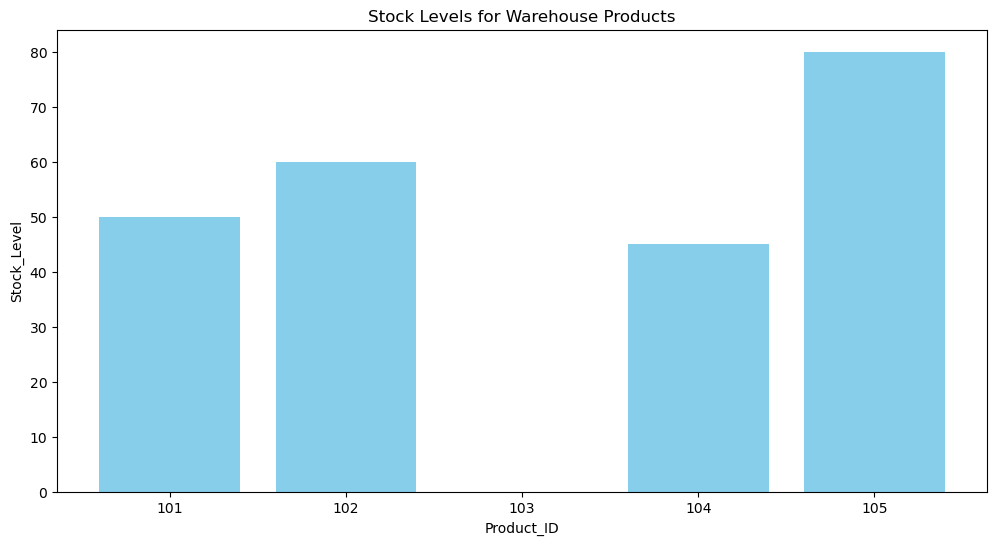

In [16]:
import matplotlib.pyplot as plt


df['Product_ID'] = pd.to_numeric(df['Product_ID'], errors='coerce')
df['Stock_Level'] = pd.to_numeric(df['Stock_Level'], errors='coerce')

product_ids = df["Product_ID"]
stock_levels = df["Stock_Level"]

plt.figure(figsize=(12, 6))
plt.bar(x=product_ids, height=stock_levels, color='skyblue')

plt.xlabel('Product_ID')
plt.ylabel('Stock_Level')
plt.title('Stock Levels for Warehouse Products')

plt.show()



Handling Categorical Data

In [18]:
df['Product_Name'] = df['Product_Name'].str.replace('[^a-zA-Z0-9\s]', '')


/var/folders/sh/8wmrp9hs5bn4nq4jmq1t_d9r0000gn/T/ipykernel_86011/2884761651.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Product_Name'] = df['Product_Name'].str.replace('[^a-zA-Z0-9\s]', '')


# Removing outliers 

In [19]:
df['Stock_Level'] = df['Stock_Level'].clip(lower=0)
df['Demand_Frequency'] = df['Demand_Frequency'].clip(lower=0)


In [20]:
df

,Product_ID,Product_Name,Stock_Level,Demand_Frequency,Date_Received,Supplier_Name_CAT_LPT,Supplier_Name_CAT_NV,Supplier_Name_Finning_AL,Supplier_Name_Finning_BC,Supplier_Name_Toromont
0,101,CabinAirClean,50.0,100.0,2022-01-01,1,0,0,0,0
1,102,CircleDriveOil,60.0,120.0,2022-02-15,0,0,0,0,0
2,103,FuelFilterChange,NaN,NaN,2022-03-20,0,0,0,0,1
3,104,EngineCrankcase,45.0,90.0,2022-04-10,0,1,0,0,0
4,105,WindowWiperBlade,80.0,NaN,2022-05-05,0,0,0,1,0
5,106,RotatingBit,NaN,110.0,2022-06-18,0,0,1,0,0


# Normalization

In [24]:
'''Apling the formula of normilzatoion'''

df['Stock_Level'] = (df['Stock_Level'] - df['Stock_Level'].min()) / (df['Stock_Level'].max() - df['Stock_Level'].min())
df['Demand_Frequency'] = (df['Demand_Frequency'] - df['Demand_Frequency'].min()) / (
            df['Demand_Frequency'].max() - df['Demand_Frequency'].min())


# Export Cleaned Data

In [22]:
df.to_csv('cleaned_warehouse_inventory.csv', index=False)


In [23]:
df

,Product_ID,Product_Name,Stock_Level,Demand_Frequency,Date_Received,Supplier_Name_CAT_LPT,Supplier_Name_CAT_NV,Supplier_Name_Finning_AL,Supplier_Name_Finning_BC,Supplier_Name_Toromont
0,101,CabinAirClean,0.142857,0.333333,2022-01-01,1,0,0,0,0
1,102,CircleDriveOil,0.428571,1.000000,2022-02-15,0,0,0,0,0
2,103,FuelFilterChange,NaN,NaN,2022-03-20,0,0,0,0,1
3,104,EngineCrankcase,0.000000,0.000000,2022-04-10,0,1,0,0,0
4,105,WindowWiperBlade,1.000000,NaN,2022-05-05,0,0,0,1,0
5,106,RotatingBit,NaN,0.666667,2022-06-18,0,0,1,0,0


In [26]:
'''Future Data Cleaning Challenges
While the basic cleaning steps have been applied successfully, future challenges may include:")
- Handling more complex missing data patterns.
- Dealing with unstructured data formats like text or images.
- Implementing advanced imputation techniques for missing values.
- Addressing data quality issues and outliers in a more sophisticated manner.
- Managing large-scale datasets efficiently
- Integrating data from diverse sources and formats
- Implementing automated data cleaning pipelines for real-time data
- These challenges highlight the need for advanced data science skills, such as those taught in the UBC MDS program, to tackle more complex and diverse data cleaning scenarios'''

'Future Data Cleaning Challenges\nWhile the basic cleaning steps have been applied successfully, future challenges may include:")\n- Handling more complex missing data patterns.\n- Dealing with unstructured data formats like text or images.\n- Implementing advanced imputation techniques for missing values.\n- Addressing data quality issues and outliers in a more sophisticated manner.\n- Managing large-scale datasets efficiently\n- Integrating data from diverse sources and formats\n- Implementing automated data cleaning pipelines for real-time data\n- These challenges highlight the need for advanced data science skills, such as those taught in the UBC MDS program, to tackle more complex and diverse data cleaning scenarios'